# Introduction to Machine Learning 

Notebook prepared by [Chloé-Agathe Azencott](http://cazencott.info), with thanks to [Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook). Data from the GEMLeR (Gene Expression Machine Learning Repository) maintained by [Gregor Stiglic](http://www.ri.fzv.um.si/gstiglic/).

In this notebook, we'll try to build a classifier that automatically separates breast cancer tumor from ovarian cancer tumors, from the gene expression (microarray data) of 3,000 genes.

# 1. Preamble
## 1.1 What is Jupyter? 

A Jupyter notebook is a web application that allows you to create and share documents (such as this `.ipynb` notebook) that contain live code, visualisations and explanatory text (with equations).

Here are some tips on using a Jupyter notebook:
* Each block of text is contained in a _cell_. A cell can be either raw text, code, or markdown text (such as this cell). For more info on markdown syntax, follow the [guide](http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html).
* You can run a cell by clicking inside it and hitting `Shift+Enter` (or the play button in the toolbar).

In [ ]:
2 + 2  # hit Shift+Enter to run

* If you want to create a new cell below the one you're running, hit `Alt+Enter` (or the plus button in the toolbar).

Some tips on using a Jupyter notebook with Python:
* A notebook behaves like an interactive python shell! This means that
    * classes, functions, and variables defined at the cell level have global scope throughout the notebok
    * hitting `Tab` will autocomplete the keyword you have started typing
    * typing a question mark after a function name will load the interactive help for this function.
* Jupyter has special Python commands (shortcuts, if you will) called _magics_. For instance, `%bash` will allow you to run bash code, `%paste` will allow you to paste a block of code while retaining its formating, and `%matplotlib inline` will import the visualization library matplotlib, and automatically display its plots inline, that is, below the cell. Here's a full list: http://ipython.readthedocs.io/en/stable/interactive/magics.html 
* Learn more about the interactive Python shell here: http://ipython.readthedocs.io/en/stable/interactive/tutorial.html

For more info on Jupyter: https://jupyter.org/

### Google Colab

You can run this notebook on [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb).

Here are several things you will need that are specific to Google Colab:
* Make sure to download the data file `small_Breast_Ovary.csv` locally (to your computer), and upload it again on Colab.
* You may need to force Colab to use Python 3.7. To do so, uncomment (that is to say, remove the `# `) and run the cell below:

In [ ]:
#!apt-get install python3.7

### Local installs

If you want to be able to run this notebook on your own machine, here's what you'll need:

__Option 1:__ If you are familiar with python and comfortable with managing your own installation, make sure you have Python 3.7 installed and the following packages (all can be installed with pip): numpy, scipy, pandas, matplotlib, scikit-learn, jupyter and jupyterlab.

__Option 2:__ If you are not familiar with python and library management, we recommand using either
* miniconda: https://docs.conda.io/en/latest/miniconda.html
* anaconda: https://www.anaconda.com/distribution/
Miniconda is lighter, but you will need to make sure all the required packages are installed; anaconda is heavier (requires a few GB of space) but everything should work “out of the box”.

Make sure to follow the installation instructions for your operating system (Mac/Windows/Linux) and install the Python 3.7 version.

If you’re unsure whether your Windows machine is running a 32-bit or 64-bit system, you can use the instructions here: https://www.lifewire.com/am-i-running-a-32-bit-or-64-bit-version-of-windows-2624475 to check. If you have a 32-bit version, you’ll need to use miniconda. For Linux, run “uname -i” in a terminal. If the answer is x86_64, you have a 64-bit system; if it is i386 or i686, you have a 32-bit system.

## 1.2 Data science libraries

Let us start with the Jupyter magic "`%pylab inline`", which is equivalent to importing `numpy` as `np`, and importing `matplotlib` as `plt`. 

`numpy` (for "numeric python") is the library used for manipulating arrays (typically representing vectors and matrices) in Python. To access object `a_numpy_object` from `numpy`, we'll use `np.a_numpy_object`.

`matplotlib` is a plotting library inspired by Matlab.

The `inline` specifier makes it so that the plots will appear under the cell and not in a separate window.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


This command is equivalent to:

```python
import numpy as np
import matplotlib.plot as plt
```

We will also import the `pandas` library, which is very useful for data manipulation.

__Documentation:__ http://pandas.pydata.org/pandas-docs/stable/

In [2]:
import pandas as pd

In [3]:
#For all our machine learning purposes, we will use the libray `scikit-learn`: https://scikit-learn.org/stable/index.html
Its documentation is very complete! Don't hesitate to refer to it extensively.

SyntaxError: invalid syntax (<ipython-input-3-d9a981cb7ff4>, line 1)

## 1.3 Data 

## Load the data

In this data set, each observation is a tumor, and it is described by the expression of 3,000 genes. There are two types of tumors: breast tumors and ovary tumors. Our goal will be to build a tumor classifier based on gene expression.

In [4]:
bvo_df = pd.read_csv('small_Breast_Ovary.csv')

In [5]:
bvo_df.head()

,ID_REF,212891_s_at,1565149_at,231148_at,241564_at,206135_at,225186_at,228366_at,204447_at,224369_s_at,...,244675_at,221893_s_at,208053_at,244232_at,205390_s_at,1555617_x_at,1562030_at,1555677_s_at,209087_x_at,Tissue
0,138027,587.6,221.8,18.5,117.5,154.2,369.7,277.2,702.9,1216.9,...,17.1,551.7,21.5,169.0,117.8,279.2,111.6,8.3,1288.1,Breast
1,179861,816.3,161.2,23.4,2.2,139.9,237.6,84.8,249.3,1708.3,...,15.4,539.5,62.1,80.3,7.7,172.0,19.6,6.4,695.1,Breast
2,38092,516.7,183.4,16.6,27.7,293.2,769.7,88.1,206.7,1995.2,...,6.7,520.1,4.7,5.2,8.0,62.3,67.0,47.8,1019.0,Breast
3,89022,364.0,206.1,206.4,1.9,228.8,307.5,216.1,531.2,1092.9,...,73.9,498.5,11.8,61.7,35.3,133.9,201.0,53.3,4226.6,Breast
4,138035,927.9,175.4,407.8,5.7,151.4,548.6,537.6,127.2,478.9,...,40.7,590.1,16.8,21.0,19.5,476.0,323.6,19.4,928.7,Breast


The first column ("ID_REF") contains the sample ID, the last one ("Tissue") the "Breast" or "Ovary" label, and all others are gene expressions.

## Transform the data in numpy arrays

The information describing the samples can be thought of as a two-dimensional numerical array or matrix, which we will call the __design matrix.__ By convention, this  matrix is often stored in a variable named `X`. It is assumed to be two-dimensional, with shape `(n_samples, n_features)`, contained in a NumPy array.

The samples (i.e., rows) always refer to the individual objects described by the dataset; here, our tumors. 

The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner; here, the transcript levels.

In addition to the feature matrix X, we also work (in supervised learning) with a NumPy array containing the labels (or targets), which we will usually call `y`. It is stored as a one-dimensional NumPy array of shape `(n_samples, )`. This __target array__ may have continuous numerical values, or discrete classes/labels. This array contains the variable we want to _predict_, by opposition to the features matrix, which contain the variables we want to _use to make our predictions_.

Let us extract these arrays from the `bvo_df` dataframe:

In [6]:
# design matrix
X = np.array(bvo_df.drop(columns=["ID_REF", "Tissue"]))

In [7]:
X.shape

(542, 3000)

We have 542 samples, each represented by 3000 gene expressions.

In [8]:
n_features = X.shape[1]

In [9]:
# target array
y = np.array(bvo_df["Tissue"])

# convert "Breast" in 0 and the other labels (here, "Ovarian") into 1
y = np.where(y=='Breast', 0, 1)

In [10]:
y.shape

(542,)

### Data standardization

Let us make sure our features all have a mean of 0 and a standard deviation of 1: this will avoid giving too much importance to genes that are more abundant across the whole data set.

This can easily be done with scikit-learn's [preprocessing module](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing)

In [11]:
from sklearn import preprocessing

Let us instantiate a scaler:

In [12]:
scaler = preprocessing.StandardScaler()

And then compute the scaling parameters on our data:

In [13]:
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

Now we can create a scaled version of the data:

In [14]:
X_scaled = scaler.transform(X)

In [15]:
X_scaled

array([[ 0.08352948, -0.21397812, -0.46468955, ..., -0.25945544,
        -0.64886073, -0.03723674],
       [ 0.89613777, -0.5878718 , -0.44264094, ..., -1.23653314,
        -0.69581566, -0.53377918],
       [-0.16838975, -0.45090085, -0.47323902, ..., -0.73312571,
         0.32730748, -0.26256486],
       ...,
       [-0.77669119,  4.98104626, -0.38594451, ...,  0.47016672,
        -0.37701642, -0.74051835],
       [ 0.65807587,  1.15573139, -0.52723562, ..., -1.2535258 ,
        -0.65133204, -0.28173993],
       [-0.03443552,  1.07799112,  0.29081287, ...,  0.736739  ,
        -0.56483612, -0.38590499]])

# 2. Training a logistic regression
In this section you will learn how to train a logistic regression on this data.

All machine learning algorithms implemented in scikit-learn follow the same logic:

1. Choose an algorithm and import the appropriate class from scikit-learn

The [logistic regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#), which is a linear model, is part of the `linear_model` module.

In [16]:
from sklearn import linear_model

2. Instantiate this class with desired hyperparameters.

Here, we don't want to use regularization yet, so we'll use `penalty='None'`.

In [17]:
my_model = linear_model.LogisticRegression(penalty='none')

3. Fit the model to the data using `fit()`.

At this stage, our model has not seen any data. Now we'll pass it the data we want it to learn on. 

In [18]:
my_model.fit(X_scaled, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

We have learned a model! In the case of linear models, we can inspect its coefficients:

In [19]:
my_model.coef_

array([[ 0.08172635,  0.06585979,  0.17198279, ..., -0.04973479,
        -0.07122699, -0.0933592 ]])

Text(0, 0.5, 'Coefficient in the logistic model')

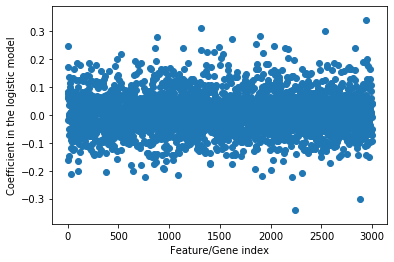

In [20]:
plt.scatter(np.arange(n_features), my_model.coef_)
plt.xlabel("Feature/Gene index")
plt.ylabel("Coefficient in the logistic model")

Notice that most of these coefficients are very close to zero... this is why we'll use regularization later on.

4. Use the model to make predictions with `predict()`.

Here we'll make predictions on the data we used to learn from.

In [21]:
y_predicted = my_model.predict(X_scaled)

Scikit-learn has a lot of ways to evaluate predictions in its [`metrics`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics) module.

We can for example look at the accuracy of our model: what proportion of the samples did it predict correctly?

In [22]:
from sklearn import metrics

In [23]:
print("Accuracy of the logistic regression: %.3f" % metrics.accuracy_score(y, y_predicted))

Accuracy of the logistic regression: 1.000


__Wow!__ Our model made perfect predictions!

True, but that's easy to do on the data it learned from... Think of it as being tested on the exact same exercises you did in class — not the same as being able to solve a brand new problem, right?

# 3. Using a test set

It's much more realistic to evaluate the performance of a model on data it has never seen before. For that reason, we're going to set aside a chunk of our data, called the __test set__, which we'll only use for evaluation purposes. We'll train on our model on the rest of the data, called the __train set__.

## 3.1 Splitting the data into a train and a test set

Scikit-learn provide utilities to create train and test sets (and more complex evaluation/validation set ups) in the `model_selection` module.

In [24]:
from sklearn import model_selection

In [25]:
(X_train, X_test, y_train, y_test) = model_selection.train_test_split(X_scaled, y, 
                                                                      test_size=0.2, 
                                                                      stratify=y # stratifying means respecting the proportion of samples of each class in all sets
                                                                     )

`test_size=0.2` means the test set will be 20% of the full set

`stratify=y` means the relative proportions of samples of each class in `y` will be respected in the train and test sets.

In [26]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((433, 3000), (433,), (109, 3000), (109,))

The train set contains 433 samples ; the test set contains 109 samples.

## 3.1 Training on the train set only

We can now train on logistic regression on the train set only:

In [27]:
my_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 3.2 Evaluation on the test set

Let us now use this model to make predictions on the test set:

In [28]:
y_predicted = my_model.predict(X_test)

The accuracy of the model is now:

In [29]:
print("Accuracy of the logistic regression: %.3f" % metrics.accuracy_score(y_test, y_predicted))

Accuracy of the logistic regression: 0.945


Not bad, but it's not perfect any longer.

To understand this performance in more depth, we can look at the __confusion matrix__ of our predictions:

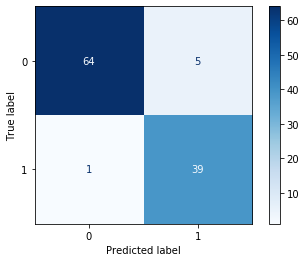

In [30]:
metrics.plot_confusion_matrix(my_model, X_test, y_test, 
                             cmap=plt.cm.Blues # use a blue color map
                             )

The bottom left cell contains the number of tumors that were predicted to be from breast cancer (Predicted label=0), whereas they were ovarian cancer (True label=1). 

# 4. Regularized logistic regression

Let us look a the model coefficients again:

Text(0, 0.5, 'Coefficient in the logistic model')

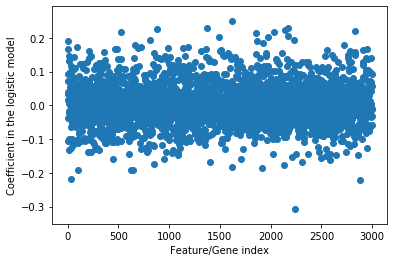

In [31]:
plt.scatter(np.arange(n_features), my_model.coef_)
plt.xlabel("Feature/Gene index")
plt.ylabel("Coefficient in the logistic model")

Many of these coefficients are very close to 0. Using a logistic regression with l1 regularization can bring down these coefficients to exactly zero, resulting in a _sparse_ model. Then we can make the hypothesis that only the genes that have non-zero coefficients in the model are relevant to the prediction!

## 4.1 Training a regularized logistic regression

In [32]:
my_l1_regularized_model = linear_model.LogisticRegression(penalty='l1',
                                                         solver='liblinear')

`solver='liblinear'` tells scikit-learn which optimization algorithm to use to fit the model. The default solver is not compatible with l1 regularization, so here we need to explicitely set a solver that can be used for l1 regularization. You can learn more about it [in the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#).

In [33]:
my_l1_regularized_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

## 4.2 Effect of the regularization on the model coefficients

Let us now look at the model's coefficients:

Text(0.5, 1.0, 'L1-regularized logistic regression')

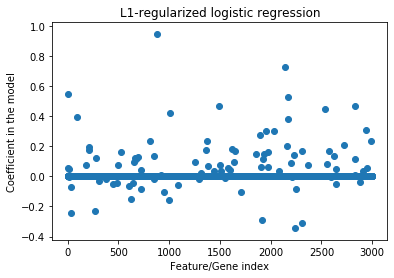

In [34]:
plt.scatter(np.arange(n_features), my_l1_regularized_model.coef_)
plt.xlabel("Feature/Gene index")
plt.ylabel("Coefficient in the model")
plt.title("L1-regularized logistic regression")

In [35]:
np.nonzero(my_model.coef_)

(array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([   0,    1,    2, ..., 2997, 2998, 2999], dtype=int64))

To make the difference more clear, we'll plot in two different colors the coefficients that are equal to zero and those that aren't:

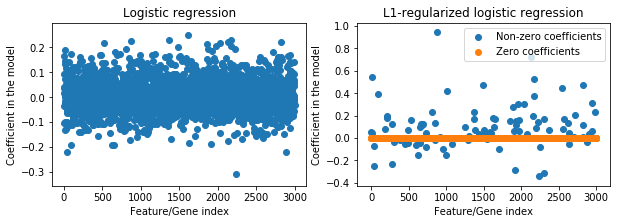

In [36]:
fig = plt.figure(figsize=(10, 3))

# First subplot in a (1 x 2) grid
ax = plt.subplot(1, 2, 1)
nonzero_coefficents_indices = np.nonzero(my_model.coef_)
plt.scatter(nonzero_coefficents_indices[1], 
            my_model.coef_[nonzero_coefficents_indices], label='Non-zero coefficients')
zero_coefficients_indices = np.nonzero(my_model.coef_ == 0)
plt.scatter(zero_coefficients_indices[1], 
           my_model.coef_[zero_coefficients_indices], label='Zero coefficients')
plt.xlabel("Feature/Gene index")
plt.ylabel("Coefficient in the model")
plt.title("Logistic regression")

# Second subplot in a (1 x 3) grid
ax = plt.subplot(1, 2, 2)
nonzero_coefficents_indices = np.nonzero(my_l1_regularized_model.coef_)
plt.scatter(nonzero_coefficents_indices[1], 
            my_l1_regularized_model.coef_[nonzero_coefficents_indices], label='Non-zero coefficients')
zero_coefficients_indices = np.nonzero(my_l1_regularized_model.coef_ == 0)
plt.scatter(zero_coefficients_indices[1], 
            my_l1_regularized_model.coef_[zero_coefficients_indices], label='Zero coefficients')
plt.xlabel("Feature/Gene index")
plt.ylabel("Coefficient in the model")
plt.title("L1-regularized logistic regression")

plt.legend()

Without logistic regression, there is no feature that has exactly a coefficient of zero!

## 4.3 Prediction performance

In [37]:
y_predicted_l1log = my_l1_regularized_model.predict(X_test)

The accuracy of the model is now:

In [38]:
print("Accuracy of the l1-regularized logistic regression: %.3f" % metrics.accuracy_score(y_test, y_predicted_l1log))

Accuracy of the l1-regularized logistic regression: 0.954


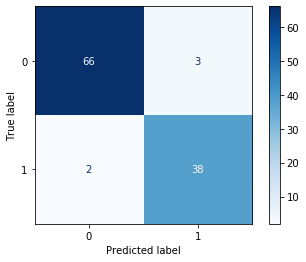

In [39]:
metrics.plot_confusion_matrix(my_l1_regularized_model, X_test, y_test, 
                             cmap=plt.cm.Blues # use a blue color map
                             )

## 4.4 Effect of the amount of regularization

### Large regularization

We have used the default setting for the inverse of the regularization strength parameter `C`. 

However, changing this hyperparameter has a strong effect: the stronger the regularization (i.e. the smaller `C`), the more coefficients will be set to zero in the model. 

We can observe this by reiterating the above experiment with `C=0.01`:

In [40]:
my_l1_regularized_model_2 = linear_model.LogisticRegression(penalty='l1',
                                                            solver='liblinear', 
                                                           C=0.01)

In [41]:
my_l1_regularized_model_2.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Let us look at the coefficients now:

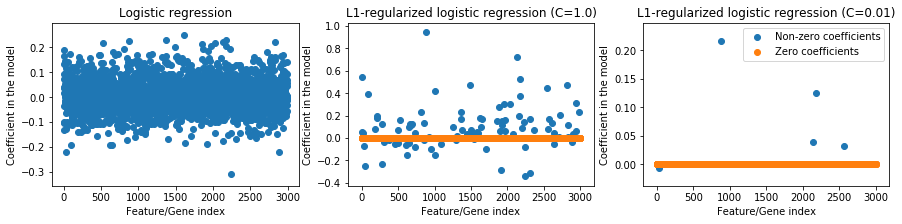

In [42]:
fig = plt.figure(figsize=(15, 3))

# First subplot in a (1 x 3) grid
ax = plt.subplot(1, 3, 1)
nonzero_coefficents_indices = np.nonzero(my_model.coef_)
plt.scatter(nonzero_coefficents_indices[1], 
            my_model.coef_[nonzero_coefficents_indices], label='Non-zero coefficients')
zero_coefficients_indices = np.nonzero(my_model.coef_ == 0)
plt.scatter(zero_coefficients_indices[1], 
           my_model.coef_[zero_coefficients_indices], label='Zero coefficients')
plt.xlabel("Feature/Gene index")
plt.ylabel("Coefficient in the model")
plt.title("Logistic regression")

# Second subplot in a (1 x 3) grid
ax = plt.subplot(1, 3, 2)
nonzero_coefficents_indices = np.nonzero(my_l1_regularized_model.coef_)
plt.scatter(nonzero_coefficents_indices[1], 
            my_l1_regularized_model.coef_[nonzero_coefficents_indices], label='Non-zero coefficients')
zero_coefficients_indices = np.nonzero(my_l1_regularized_model.coef_ == 0)
plt.scatter(zero_coefficients_indices[1], 
            my_l1_regularized_model.coef_[zero_coefficients_indices], label='Zero coefficients')
plt.xlabel("Feature/Gene index")
plt.ylabel("Coefficient in the model")
plt.title("L1-regularized logistic regression (C=1.0)")

# Third subplot in a (1 x 3) grid
ax = plt.subplot(1, 3, 3)
nonzero_coefficents_indices = np.nonzero(my_l1_regularized_model_2.coef_)
plt.scatter(nonzero_coefficents_indices[1], 
            my_l1_regularized_model_2.coef_[nonzero_coefficents_indices], label='Non-zero coefficients')
zero_coefficients_indices = np.nonzero(my_l1_regularized_model_2.coef_ == 0)
plt.scatter(zero_coefficients_indices[1], 
            my_l1_regularized_model_2.coef_[zero_coefficients_indices], label='Zero coefficients')
plt.xlabel("Feature/Gene index")
plt.ylabel("Coefficient in the model")
plt.title("L1-regularized logistic regression (C=0.01)")

plt.legend()

Many more coefficients are equal to zero now. How did this affect the prediction performance?

In [43]:
y_predicted_l1log_2 = my_l1_regularized_model_2.predict(X_test)

The accuracy of the model is now:

In [44]:
print("Accuracy of the l1-regularized logistic regression (C=0.01): %.3f" % metrics.accuracy_score(y_test, y_predicted_l1log_2))

Accuracy of the l1-regularized logistic regression (C=0.01): 0.890


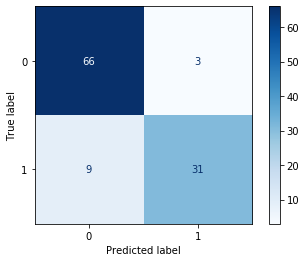

In [45]:
metrics.plot_confusion_matrix(my_l1_regularized_model_2, X_test, y_test, 
                             cmap=plt.cm.Blues # use a blue color map
                             )

Increasing the amount of regularization reduces the number of features used by the model, but this can also hurt performance.

## 4.5 Setting the amount of regularization by cross-validation

We now want to perform __model selection__, that is to say, _select_ the best value of `C`. 

One way to approach the problem would be to test several values for `C` and compare performance on the test set. We would then pick the value of `C` leading to the best performance. Unfortunately, if we proceed in this way, the performance we observe on the test set is biased: it's not true any more to say that we have not touched the test set to create our model! 

What we could do now is split the training set into two sets again: a train set and a validation set. 

However, if we split the data in, say, 60% train + 20% validation + 20% test, now we're only using little more than half our data for training! This is not optimal, especially if the initial set of training data is small, because the more data we have, the better we learn. 

One way to address this is to use __cross-validation__; that is, to do a sequence of fits where each subset of the data is used both as a training set and as a validation set. If we do a 5-fold cross-validation, we split the data in 5 blocks, and run 5 experiments for each value of `C` that we want to test: use the first 4 blocks for training and the last one for validation ; use the three first blocks and the last one for training, and the fourth one for validation ; and so on and so forth. We end up with 5 measures of performance for each value of `C`, which we can then average to get a global picture of the performance (still for each value of `C`). We can now pick the value of `C` that led to the best performance, train our model again on the training set, and evaluate its performance on the test set.

### Automated model selection by cross-validation with `GridSearchCV`

Let us start by setting up a grid of values of `C`. We'll use 50 values, spread on a logarithmic scale between 1e-3 and 1e3:

In [46]:
C_values = np.logspace(-3, 3, 50)

We can now use scikit-learn's `GridSearchCV`:

In [47]:
l1_regularized_cv = model_selection.GridSearchCV(linear_model.LogisticRegression(penalty='l1', solver='liblinear'), 
                                                 {'C': C_values},
                                                 cv=5)

`{'C': C_values}` tells scikit-learn that it will have to consider all models `linear_model.LogisticRegression(penalty='l1', solver='liblinear', C=xxx)` with `xxx` in `C_values`. 

`cv=5` tells scikit-learn to use a 5-fold cross-validation

Now we can train our model as usual:

In [49]:
l1_regularized_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-03...
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.

The optimal value of the hyperparameter is in the `best_params_` attribute of our trained model:

### Optimal model

In [50]:
l1_regularized_cv.best_params_

{'C': 429.1934260128778}

The corresponding performance in the `best_score_` attribute of our trained model:

In [51]:
l1_regularized_cv.best_score_

0.979256883186314

Wait, but what measure of performance is this? The [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) tells us that this can be set with the `scoring` parameter of `GridSearchCV`, which we did not touch. So the default was used — the documentation reads "If None, the estimator’s score method is used." So let's look up the documentation of [LogisticRegression()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logistic%20regression#); it tells us that its `score` method returns the mean accuracy, so that's what we're looking at.

scikit-learn has also retrained a l1-regularized logistic regression with the optimal hyperparameter. It is accessible in the `best_estimator_` attribute of our model:

In [52]:
l1_regularized_cv.best_estimator_

LogisticRegression(C=429.1934260128778, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

We can plot the weights of this model:

Text(0.5, 1.0, 'L1-regularized logistic regression')

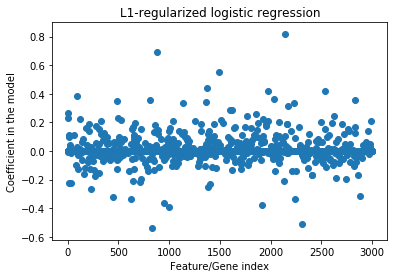

In [53]:
plt.scatter(np.arange(n_features), l1_regularized_cv.best_estimator_.coef_)
plt.xlabel("Feature/Gene index")
plt.ylabel("Coefficient in the model")
plt.title("L1-regularized logistic regression")

We can look at the performance of this model on the test data set:

In [54]:
y_predicted_l1log_cv = l1_regularized_cv.best_estimator_.predict(X_test)

In [55]:
print("Accuracy of the l1-regularized logistic regression (optimal C): %.3f" % metrics.accuracy_score(y_test, y_predicted_l1log_cv))

Accuracy of the l1-regularized logistic regression (optimal C): 0.936


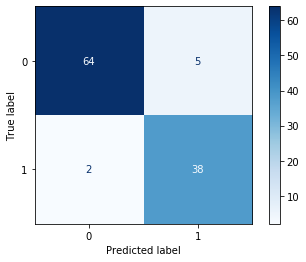

In [56]:
metrics.plot_confusion_matrix(l1_regularized_cv.best_estimator_, X_test, y_test, 
                             cmap=plt.cm.Blues # use a blue color map
                             )

The number of selected features is:

In [57]:
np.count_nonzero(l1_regularized_cv.best_estimator_.coef_)

485

# 5. Scoring for an unbalanced data set

We used accuracy to select the best model. However, the data is _unbalanced_: there are more breast tumors than ovarian tumors. Let us check their numbers in the training set:

In [58]:
print("Number of breast tumors = %d (%.2f %%  of the training set)" % ((np.count_nonzero(y_train==0)), 100*(np.count_nonzero(y_train==0)/y_train.shape[0])))
print("Number of ovarian tumors = %d (%.2f %% of the training set)" % (np.count_nonzero(y_train==1), 100*(np.count_nonzero(y_train==1)/y_train.shape[0])))

Number of breast tumors = 275 (63.51 %  of the training set)
Number of ovarian tumors = 158 (36.49 % of the training set)


What this means is that, on the training set, a model that sytematically returns 0 (i.e. "breast") will have an accuracy of 63.5%.

The imbalance in the data means that models will tend to favor the majority class.

To avoid this, we can use a performance score that accounts for this imbalance. These include the __balanced accuracy__ and the __f1__ score. You can learn more about them in the [documentation](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-metrics).

## 5.1 Balanced accuracy of the previous model

In [59]:
print("Balanced accuracy of the l1-regularized logistic regression (optimal C): %.3f" % metrics.balanced_accuracy_score(y_test, y_predicted_l1log_cv))

Balanced accuracy of the l1-regularized logistic regression (optimal C): 0.939


## 5.2 Optimizing for balanced accuracy

In [60]:
l1_regularized_cv_ba = model_selection.GridSearchCV(linear_model.LogisticRegression(penalty='l1', solver='liblinear'), 
                                                   {'C': C_values},
                                                   cv=5, scoring='balanced_accuracy')

In [61]:
l1_regularized_cv_ba.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l1',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.00000000e-03...
       8.28642773e+00, 1.09854114e+01, 1.45634848e+01, 1.93069773e+01,
       2.55954792e+01, 3.39322177e+01, 4.49843267e+01, 5.96362332e+01,
       7.90604321e+01, 1.04811313e+02, 1.38949549e+02, 1.84206997e+02,
       2.44205309e+02, 3.23745754e+02, 4.29193426e+02, 5.68986603e+02,
       7.

In [62]:
l1_regularized_cv_ba.best_params_

{'C': 568.9866029018293}

In [63]:
l1_regularized_cv_ba.best_score_

0.975082478005865

In [64]:
l1_regularized_cv_ba.best_estimator_

LogisticRegression(C=568.9866029018293, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

We can plot the weights of this model:

Text(0.5, 1.0, 'L1-regularized logistic regression')

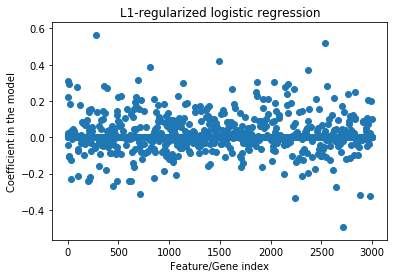

In [65]:
plt.scatter(np.arange(n_features), l1_regularized_cv_ba.best_estimator_.coef_)
plt.xlabel("Feature/Gene index")
plt.ylabel("Coefficient in the model")
plt.title("L1-regularized logistic regression")

In [66]:
np.count_nonzero(l1_regularized_cv_ba.best_estimator_.coef_)

558

We can look at the performance of this model on the test data set:

In [67]:
y_predicted_l1log_cv = l1_regularized_cv_ba.best_estimator_.predict(X_test)

In [68]:
print("Balanced accuracy of the l1-regularized logistic regression (optimal C): %.3f" % metrics.balanced_accuracy_score(y_test, y_predicted_l1log_cv))

Balanced accuracy of the l1-regularized logistic regression (optimal C): 0.966


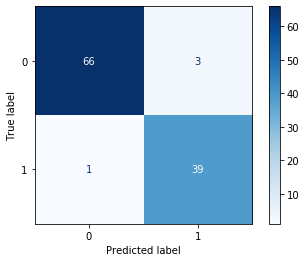

In [69]:
metrics.plot_confusion_matrix(l1_regularized_cv_ba.best_estimator_, X_test, y_test, 
                             cmap=plt.cm.Blues # use a blue color map
                             )

# 6. Decision trees and random forest classifiers

## 6.1 Decision tree

Let us start with a simple non-linear models: a decision tree. They are implemented in scikit-learn's [tree.DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [70]:
from sklearn import tree

We create a DT model:

In [71]:
dt_model = tree.DecisionTreeClassifier()

We can now train a decision tree on the train set only:

In [72]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Let us now use this model to make predictions on the test set:

In [73]:
y_predicted = dt_model.predict(X_test)

The performance of the decision tree is:

In [74]:
print("Accuracy of the decision tree: %.3f" % metrics.accuracy_score(y_test, y_predicted))

Accuracy of the decision tree: 0.945


In [75]:
print("Balanced accuracy of the decision tree: %.3f" % metrics.balanced_accuracy_score(y_test, y_predicted))

Balanced accuracy of the decision tree: 0.936


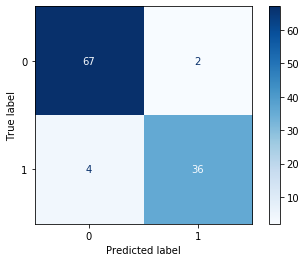

In [76]:
metrics.plot_confusion_matrix(dt_model, X_test, y_test, 
                             cmap=plt.cm.Blues # use a blue color map
                             )

A decision tree clearly underperforms compared to a logistic regression.

Can we improve this with __ensemble methods__?

## 6.2 Random forests

A random forest combines the prediction of multiple decision trees, each trained on a subset of the samples and of the features.

Can an ensemble method improve the performance of the decision tree on the difficult data set? We will use the random forest implementation in scikit-learn's [ensemble.RandomForestClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

In [77]:
from sklearn import ensemble

An important hyperparameter of a random forest is the number `n_estimators` of trees it contain. We will therefore use a cross-validation to fix this hyperparameter.

In [78]:
ntrees_values = [10, 20, 50, 100, 300, 500, 2000]

In [79]:
rf_cv = model_selection.GridSearchCV(ensemble.RandomForestClassifier(),  
                                     {'n_estimators': ntrees_values},
                                     cv=5, scoring='balanced_accuracy')

In [80]:
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

The optimal number of trees is:

In [81]:
rf_cv.best_params_

{'n_estimators': 2000}

In [82]:
print("Optimal cross-validated balanced accuracy: %.3f" % rf_cv.best_score_)

Optimal cross-validated balanced accuracy: 0.959


Let's see how it performs on the test set:

In [83]:
y_predicted = rf_cv.best_estimator_.predict(X_test)

In [84]:
print("Balanced accuracy of the random forest: %.3f" % metrics.balanced_accuracy_score(y_test, y_predicted))

Balanced accuracy of the random forest: 0.953


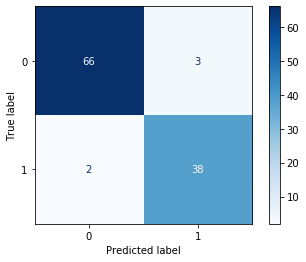

In [85]:
metrics.plot_confusion_matrix(rf_cv.best_estimator_, X_test, y_test, 
                             cmap=plt.cm.Blues # use a blue color map
                             )

The performance is much better than that of a single decision tree, and is also better than that of the linear models.

### Feature Importance

Random forests have a notion of _feature importance_, stored in the `feature_importances_` attribute. The importance of a feature is computed by looking at how much using that feature decreases the Gini impurity (a measure of classification error) of the model.

Text(0.5, 1.0, 'Random forest')

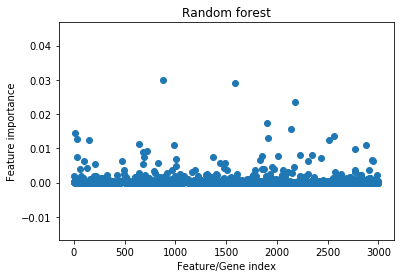

In [86]:
plt.scatter(np.arange(n_features), rf_cv.best_estimator_.feature_importances_)
plt.xlabel("Feature/Gene index")
plt.ylabel("Feature importance")
plt.title("Random forest")

We can consider that all features with a non-zero importance are selected:

In [87]:
np.count_nonzero(rf_cv.best_estimator_.feature_importances_)

2999

But that's a lot, so we can also set a threshold by hand (either on the number of features to keep, or on the importance value).

For example, here, we can decide to keep only the feature with an importance at least equal to 0.005:

In [88]:
np.count_nonzero(rf_cv.best_estimator_.feature_importances_ >= 0.005)

37

In [89]:
np.nonzero(rf_cv.best_estimator_.feature_importances_ >= 0.005)[0]

array([   7,   31,   35,   97,  149,  212,  471,  643,  676,  683,  689,
        724,  829,  877,  990, 1006, 1368, 1440, 1488, 1584, 1835, 1858,
       1900, 1917, 2009, 2138, 2174, 2224, 2306, 2347, 2439, 2513, 2565,
       2772, 2874, 2936, 2946], dtype=int64)

Can we really use only these features? Let's retrain a random forest only on those features:

In [90]:
selected_features = np.nonzero(rf_cv.best_estimator_.feature_importances_ >= 0.005)[0]

In [91]:
X_train_reduced = X_train[:, selected_features]

In [92]:
X_train_reduced.shape

(433, 37)

In [93]:
rf_reduced_cv = model_selection.GridSearchCV(ensemble.RandomForestClassifier(),  
                                     {'n_estimators': ntrees_values},
                                     cv=5, scoring='balanced_accuracy')

In [94]:
rf_reduced_cv.fit(X_train_reduced, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

The optimal number of trees is:

In [95]:
rf_reduced_cv.best_params_

{'n_estimators': 300}

In [96]:
print("Optimal cross-validated balanced accuracy: %.3f" % rf_reduced_cv.best_score_)

Optimal cross-validated balanced accuracy: 0.971


The performance didn't really drop that much!

Let's see how it performs on the test set:

In [97]:
X_test_reduced = X_test[:, selected_features]

In [98]:
y_predicted = rf_reduced_cv.best_estimator_.predict(X_test_reduced)

In [99]:
print("Balanced accuracy of the random forest: %.3f" % metrics.balanced_accuracy_score(y_test, y_predicted))

Balanced accuracy of the random forest: 0.948


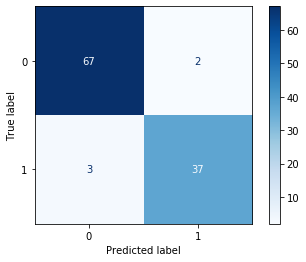

In [100]:
metrics.plot_confusion_matrix(rf_reduced_cv.best_estimator_, X_test_reduced, y_test, 
                             cmap=plt.cm.Blues # use a blue color map
                             )

Our final model makes very few mistakes and uses very few genes!